## Image Processing

## 1. Masking
Masking can be done using `bitwise_or` and `bitwise_not` operations.  
**Steps:**
1. Prepare a mask: white for the region to keep, black elsewhere.
   - Convert the mask image to grayscale.
   - Use `bitwise_not` if you need to invert white/black.
2. Extract the masked region from the source image using `bitwise_or` (with the `mask` parameter).
3. Combine the masked region with the target image using `bitwise_or`.
   - ⚠️ Both images must be the same size.

In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 1. Open the image and the masking image
pic_backpack = cv2.imread("./images/01-dog_backpack.png")
pic_watermark = cv2.imread("./images/01-watermark_no_copy.png")

pic_backpack = cv2.cvtColor(pic_backpack, cv2.COLOR_BGR2RGB)
pic_watermark = cv2.cvtColor(pic_watermark, cv2.COLOR_BGR2RGB)
pic_watermark = cv2.resize(pic_watermark, (600, 600))

print(f"Backpack: {pic_backpack.shape}")
print(f"Watermark: {pic_watermark.shape}")

Backpack: (1401, 934, 3)
Watermark: (600, 600, 3)


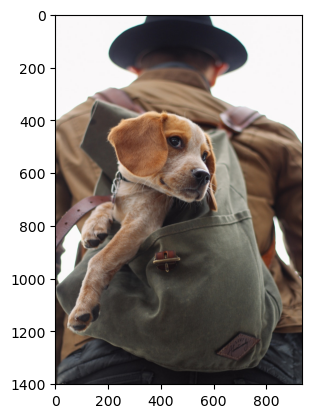

In [3]:
plt.imshow(pic_backpack)
plt.show()

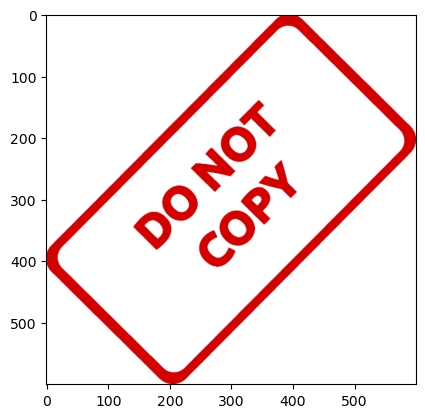

In [27]:
plt.imshow(pic_watermark)
plt.show()

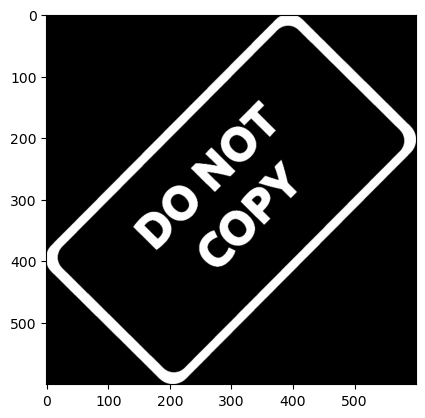

In [51]:
# 2. Convert the watermark image to grayscale
# Use bitwise_not to create a mask
pic_watermark_mask = cv2.cvtColor(pic_watermark, cv2.COLOR_BGR2GRAY)
pic_watermark_mask = cv2.bitwise_not(pic_watermark_mask)

plt.imshow(pic_watermark_mask, cmap='gray')
plt.show()

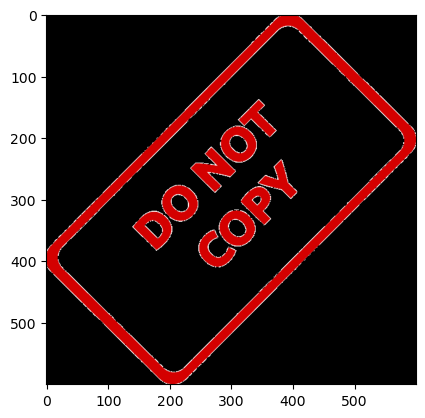

In [43]:
# Complete watermark image
pic_watermark_black_bg = cv2.bitwise_or(pic_watermark, pic_watermark, mask=pic_watermark_mask)

plt.imshow(pic_watermark_black_bg)
plt.show()

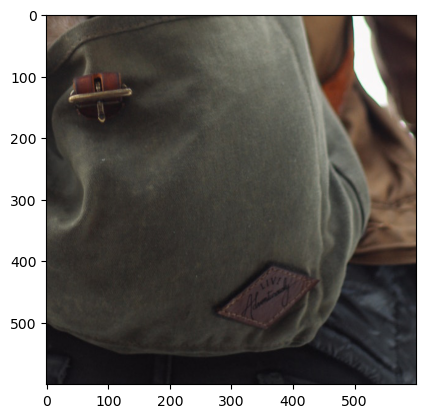

In [46]:
# Extract the original part of the backpack image where the watermark will be applied
x_offset = pic_backpack.shape[1] - pic_watermark.shape[1]
y_offset = pic_backpack.shape[0] - pic_watermark.shape[0]   

ROI = pic_backpack[y_offset:, x_offset:, :]
plt.imshow(ROI)
plt.show()


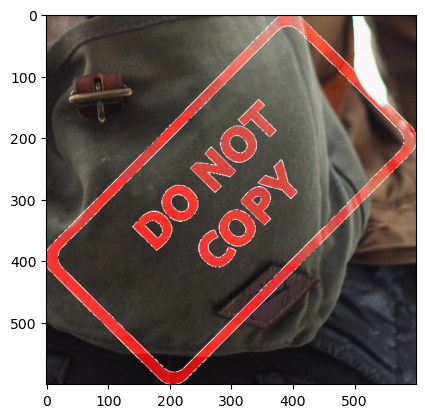

In [44]:
# Use bitwise_and to apply the mask to the backpack image
ROI_masked = cv2.bitwise_or(ROI, pic_watermark_black_bg)

plt.imshow(ROI_masked)
plt.show()


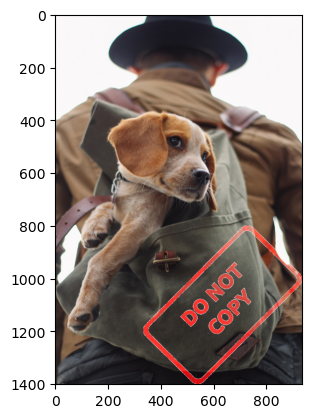

In [49]:
# Overwrite the final result
pic_backpack[y_offset:, x_offset:] = ROI_masked

plt.imshow(pic_backpack)
plt.show()  

## 2. Thresholding
`Thresholding` is a simple method of segmenting an image into parts. This will convert an image to consist of only two values: black and white.

### 2.1. Global Thresholding
 `threshold()` behave differently by its options:
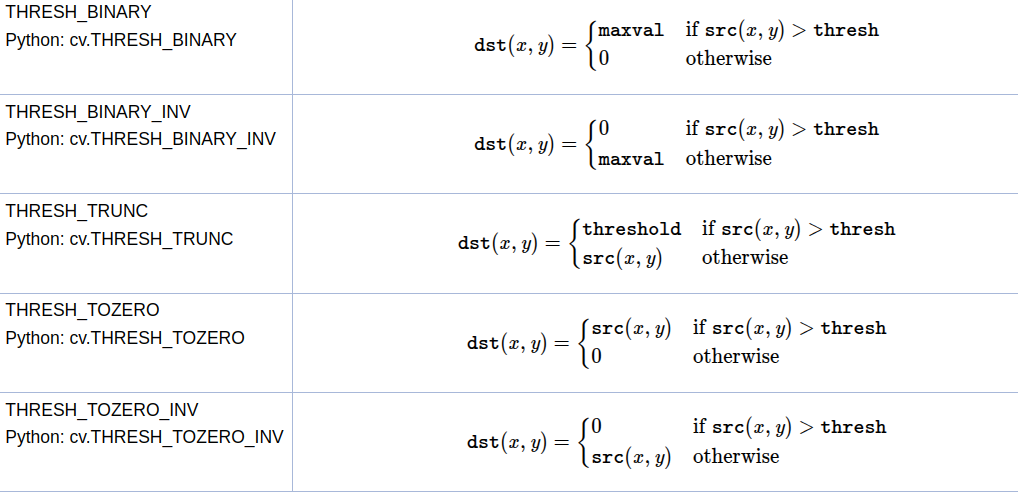  

### 2.2. Adaptive Thresholing
Adaptive thresholding calculates a threshold value for small, local regions of the image, allowing for better segmentation when lighting conditions are uneven. This is especially useful for detecting edges.

**Function:**  
`cv2.adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C, dst=None)`

**Parameters:**
- `src`: Input grayscale image (must be single channel).
- `maxValue`: Value to assign to pixels exceeding the threshold (usually 255).
- `adaptiveMethod`: How the threshold value is calculated for each pixel:
  - `cv2.ADAPTIVE_THRESH_MEAN_C`: Mean of the neighborhood area. (Widely used)
    - $\text{Threshold}=\text{MEAN}-C$
  - `cv2.ADAPTIVE_THRESH_GAUSSIAN_C`: Weighted sum (Gaussian window) of the neighborhood area.
- `thresholdType`: Type of thresholding (usually `cv2.THRESH_BINARY` or `cv2.THRESH_BINARY_INV`).
- `blockSize`: Size of the neighborhood area (must be odd, e.g., 11(11x11) or 15(15x15)).
  - Must be odd number to ensure the current pixel is in the center of the block
- `C`: Constant subtracted from the mean or weighted mean (fine-tunes the threshold).
  

**Example:**
```python
thresh = cv2.adaptiveThreshold(
    src=img_gray,
    maxValue=255,
    adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    thresholdType=cv2.THRESH_BINARY,
    blockSize=11,
    C=2
)

In [4]:
import cv2
import matplotlib.pyplot as plt

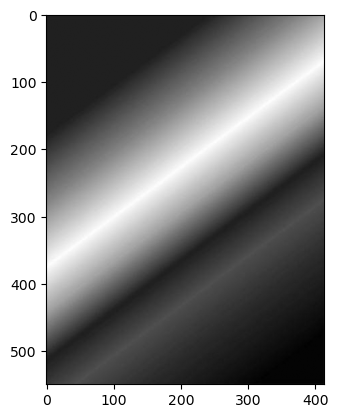

In [6]:
pic_rainbow = cv2.imread("./images/02-rainbow.jpg", cv2.IMREAD_GRAYSCALE)

plt.imshow(pic_rainbow, cmap='gray')
plt.show()

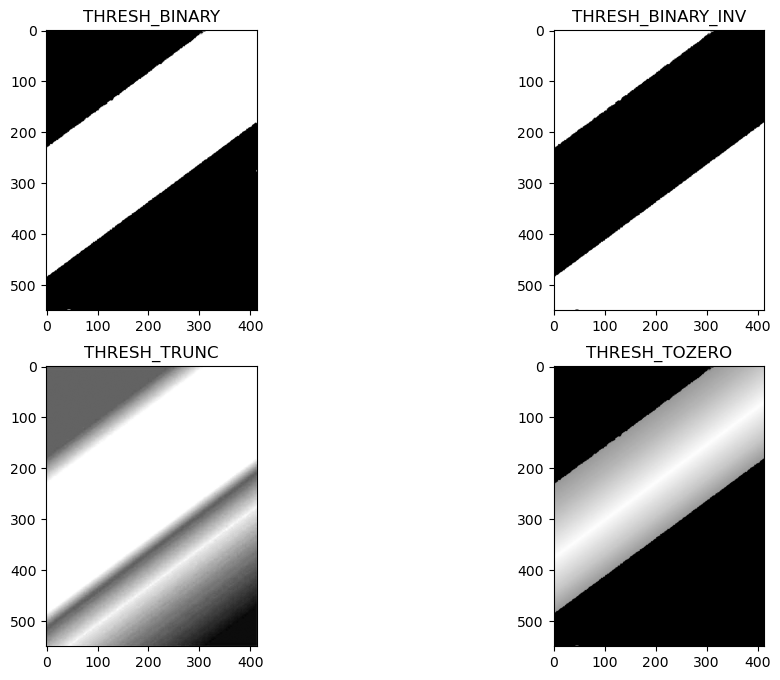

In [9]:
# Thresholding with different options
_, pic_rainbow_bin = cv2.threshold(pic_rainbow, 128, 255, cv2.THRESH_BINARY)
_, pic_rainbow_bin_inv = cv2.threshold(pic_rainbow, 128, 255, cv2.THRESH_BINARY_INV)
_, pic_rainbow_trunc = cv2.threshold(pic_rainbow, 128, 255, cv2.THRESH_TRUNC)
_, pic_rainbow_tozero = cv2.threshold(pic_rainbow, 128, 255, cv2.THRESH_TOZERO)

# Plotting the results
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.imshow(pic_rainbow_bin, cmap='gray')
plt.title('THRESH_BINARY')

plt.subplot(2, 2, 2)
plt.imshow(pic_rainbow_bin_inv, cmap='gray')
plt.title('THRESH_BINARY_INV')

plt.subplot(2, 2, 3)
plt.imshow(pic_rainbow_trunc, cmap='gray')
plt.title('THRESH_TRUNC')

plt.subplot(2, 2, 4)
plt.imshow(pic_rainbow_tozero, cmap='gray')
plt.title('THRESH_TOZERO')

plt.show()

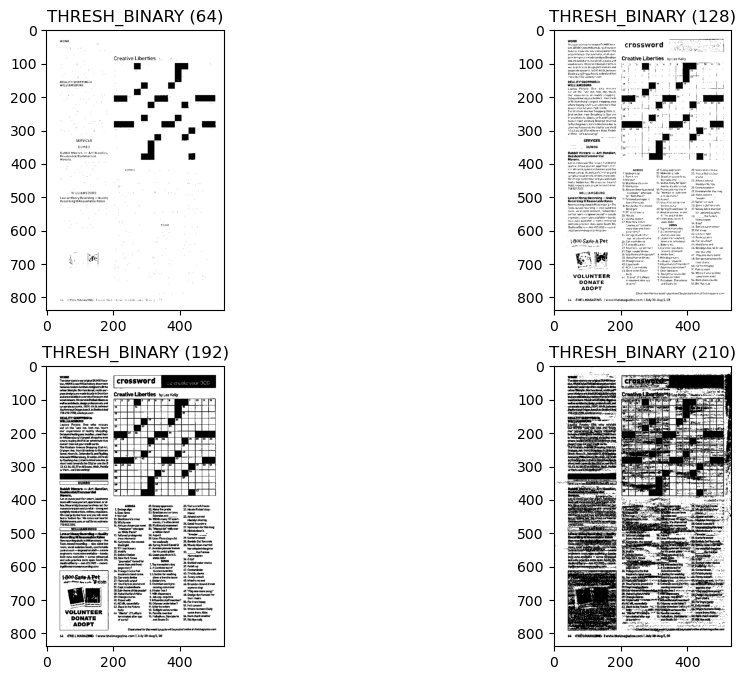

In [19]:
# Thresholding is effective in separating objects from the background (text, for example)
pic_crossword = cv2.imread("./images/02-crossword.jpg", cv2.IMREAD_GRAYSCALE)

pic_crossword_thres1 = cv2.threshold(pic_crossword, 64, 255, cv2.THRESH_BINARY)
pic_crossword_thres2 = cv2.threshold(pic_crossword, 128, 255, cv2.THRESH_BINARY)
pic_crossword_thres3 = cv2.threshold(pic_crossword, 192, 255, cv2.THRESH_BINARY)
pic_crossword_thres4 = cv2.threshold(pic_crossword, 210, 255, cv2.THRESH_BINARY)

# Plotting the results
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.imshow(pic_crossword_thres1[1], cmap='gray')
plt.title('THRESH_BINARY (64)')

plt.subplot(2, 2, 2)
plt.imshow(pic_crossword_thres2[1], cmap='gray')
plt.title('THRESH_BINARY (128)')

plt.subplot(2, 2, 3)
plt.imshow(pic_crossword_thres3[1], cmap='gray')
plt.title('THRESH_BINARY (192)')

plt.subplot(2, 2, 4)
plt.imshow(pic_crossword_thres4[1], cmap='gray')
plt.title('THRESH_BINARY (210)')

plt.show()

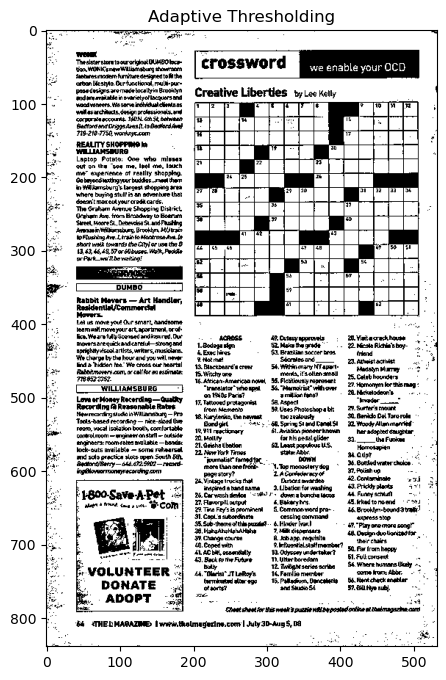

In [41]:
# Adaptive Thresholding
pic_crossword_adaptive = cv2.adaptiveThreshold(
    src=pic_crossword, 
    maxValue=255, 
    adaptiveMethod=cv2.ADAPTIVE_THRESH_MEAN_C, 
    thresholdType=cv2.THRESH_BINARY, 
    blockSize=55, 
    C=5
)

# Plotting the results
plt.figure(figsize=(12, 8))
plt.subplot(1, 1, 1)
plt.imshow(pic_crossword_adaptive, cmap='gray')
plt.title('Adaptive Thresholding')

plt.show()

## 2. Blurring
